I got the functional groups of genes from GO prepped in R beforehand (using msigdbr package).

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
import re
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy.stats import fisher_exact
from matplotlib_venn import venn3
from tqdm.notebook import tqdm
from statsmodels.stats.multitest import multipletests

# Disease plot

The dataset could only be opened in R, so I had to clean it up there. Script called OG_cleanup.R.

In [41]:
diseases = pd.read_csv("./disease_summary.csv", index_col=0)
diseases

,Disease,Count
1,Breast cancer,10
2,Colorectal cancer,10
3,"Diabetes mellitus, noninsulin-dependent",7
4,Gastrointestinal stromal tumor,7
5,Alzheimer disease,5
...,...,...
430,"Xeroderma pigmentosum, complementation group b",1
431,"Xeroderma pigmentosum, complementation group d",1
432,"Xeroderma pigmentosum, complementation group f",1
433,"Xeroderma pigmentosum, complementation group g",1


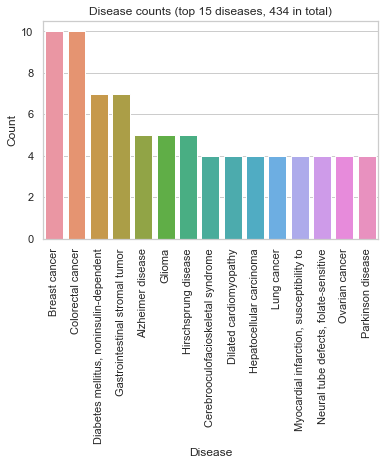

In [95]:
#diseases = pd.read_csv("./1_gene-diseases.csv", sep='(\d{1,2}.\d{1,8}),(\d{1,2}.\d{1,8}),("{"type":.*)',engine="python")
diseases = pd.read_csv("./disease_summary.csv", index_col=0)
ax = sns.barplot(x="Disease", y="Count", data=diseases.iloc[0:15,:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure.set_size_inches(5, 8)  # manually adjust figure size
#plt.tight_layout()  # automatically adjust elements inside the figure
#plt.xticks(rotation=90)
#plt.tight_layout()
ax.set_title(f"Disease counts (top 15 diseases, {len(diseases.Disease.unique())} in total)")
plt.savefig('./disease_counts_top15.pdf', bbox_inches='tight')

# Aging mechanisms

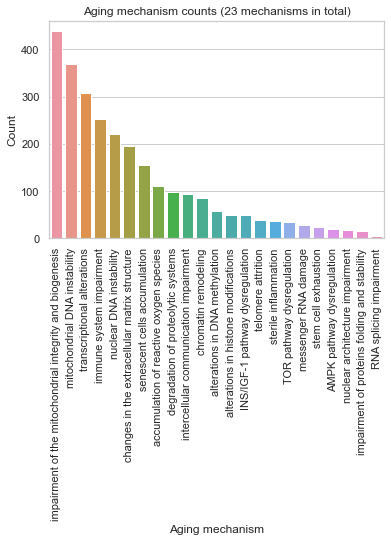

In [45]:
#diseases = pd.read_csv("./1_gene-diseases.csv", sep='(\d{1,2}.\d{1,8}),(\d{1,2}.\d{1,8}),("{"type":.*)',engine="python")
diseases = pd.read_csv("./aging_mechanism_summary.csv", index_col=0)
ax = sns.barplot(x="Aging mechanism", y="Count", data=diseases)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure.set_size_inches(5, 8)  # manually adjust figure size
#plt.tight_layout()  # automatically adjust elements inside the figure
#plt.xticks(rotation=90)
#plt.tight_layout()
ax.set_title(f"Aging mechanism counts ({len(diseases['Aging mechanism'].unique())} mechanisms in total)")
plt.savefig('./aging_mechanism_counts.pdf', bbox_inches='tight')

# Expression per tissue

In [6]:
temp

,Gene symbol,Tissue,RPKM
2,GHR,liver,35.035600
4,GHR,kidney,4.415230
55,SHC1,kidney,8.918190
60,SHC1,liver,7.319040
66,POU1F1,kidney,0.010873
...,...,...,...
12023,FOLR2,kidney,3.388210
12029,SLC19A1,liver,10.584600
12032,SLC19A1,kidney,6.876650
12064,FZD3,kidney,0.890427


In [ ]:
tissueexp = pd.read_csv("./tissueexp_cleaned.csv", index_col = 0)
tissueexp.columns = ["Gene symbol", "Tissue", "RPKM"]
tissueexp.Tissue = tissueexp.Tissue.str.strip()
temp = tissueexp[tissueexp.Tissue.isin(["kidney", "liver"])]
sns.displot(tissueexp, x="RPKM", hue="Tissue")


KeyboardInterrupt



I plotted this one in ggplot.

# Organism and tissue distributions

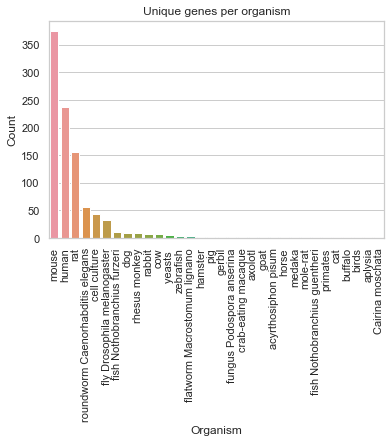

In [22]:
temp = pd.read_csv("./criteria.csv", index_col=0)
temp1 = temp.groupby("Organism").Gene.nunique()
temp1 = pd.DataFrame(temp1)
temp1 = temp1.iloc[1:,]
temp1.columns = ["Count"]
temp1["Organism"] = temp1.index
temp1 = temp1.sort_values(by="Count", ascending=False)
ax = sns.barplot(x="Organism", y="Count", data=temp1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure.set_size_inches(5, 8)  # manually adjust figure size
#plt.tight_layout()  # automatically adjust elements inside the figure
#plt.xticks(rotation=90)
#plt.tight_layout()
ax.set_title("Unique genes per organism")
plt.savefig('./organism_counts.pdf', bbox_inches='tight')

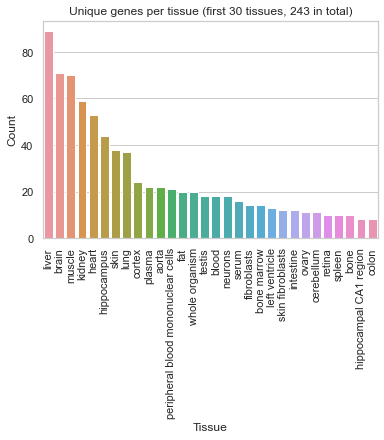

In [46]:
temp = pd.read_csv("./criteria.csv", index_col=0)
temp1 = temp.groupby("Tissue").Gene.nunique()
temp1 = pd.DataFrame(temp1)
temp1 = temp1.iloc[1:,]
temp1.columns = ["Count"]
temp1["Tissue"] = temp1.index
temp1 = temp1.sort_values(by="Count", ascending=False)
total = len(temp1.Tissue.unique())
temp1 = temp1.iloc[0:30,:]
ax = sns.barplot(x="Tissue", y="Count", data=temp1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure.set_size_inches(5, 8)  # manually adjust figure size
#plt.tight_layout()  # automatically adjust elements inside the figure
#plt.xticks(rotation=90)
#plt.tight_layout()
ax.set_title(f"Unique genes per tissue (first 30 tissues, {total} in total)")
plt.savefig('./tissue_counts_top30.pdf', bbox_inches='tight')

# Overlaps of criteria

C:\Users\liliy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
C:\Users\liliy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


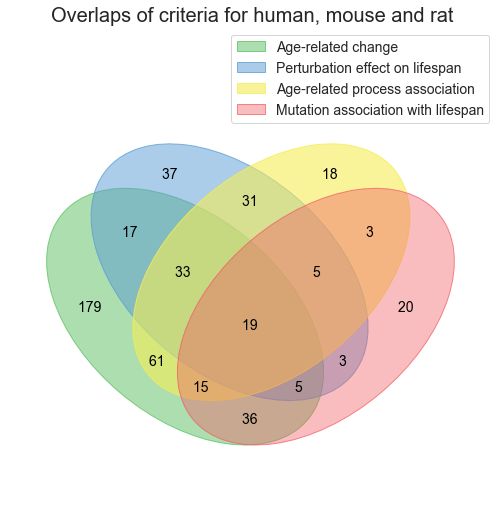

In [35]:
%matplotlib inline
import venn
temp = pd.read_csv("./criteria.csv", index_col=0)
temp = temp[temp.Organism.isin(["human", "mouse", "rat"])]
set1 = set(np.unique(temp.loc[temp.Criterion == "Age-related change","Gene"].values))
set2 = set(np.unique(temp.loc[temp.Criterion == "Perturbation effect on lifespan","Gene"].values))
set3 = set(np.unique(temp.loc[temp.Criterion == "Age-related process association","Gene"].values))
set4 = set(np.unique(temp.loc[temp.Criterion == "Mutation association with lifespan","Gene"].values))
labels = venn.get_labels([set1, set2, set3, set4], fill=['number'])
fig, ax = venn.venn4(labels, names=['Age-related change', 'Perturbation effect on lifespan', 'Age-related process association', 'Mutation association with lifespan'])
ax.set_title("Overlaps of criteria for human, mouse and rat", fontsize=20)
plt.savefig('./criteria_venn_3species.pdf')

# Functional groups

This is just to visualize the contingency table template:

In [52]:
a = pd.DataFrame([[1, 2], [3, 4]])
a.index = ["f", "not f"]
a.columns = ["og", "not og"]
a

,og,not og
f,1,2
not f,3,4


The code itself:

In [89]:
temp = pd.read_csv("./criteria.csv", index_col=0)
oggenes = set(temp.Gene.unique())
functions = pd.read_csv("./Functional group tables/KEGG_table_human.csv", index_col=0)
background = 20000
res = pd.DataFrame(columns = ["Name", "Size", "Overlap", "P value", "Odds ratio"])
for func in tqdm(functions.gs_name.unique()):
    funcgenes = set(functions.loc[functions.gs_name == func, "human_gene_symbol"].values)
    overlap = len(oggenes.intersection(funcgenes))
    table = pd.DataFrame([[overlap, len(funcgenes.difference(oggenes))],
                         [len(oggenes.difference(funcgenes)), background - len(oggenes.union(funcgenes))]])
    f_res = fisher_exact(table)
    res = res.append(pd.Series({"Name":func, "Size":len(funcgenes), "Overlap":overlap, "P value":f_res[1], "Odds ratio":f_res[0]}), ignore_index=True)

In [90]:
res = res.sort_values(by="P value")
res["Adjusted p-value"] = multipletests(pvals=res["P value"].values, method="fdr_bh", is_sorted=True)[1]
res.reset_index(inplace=True, drop=True)
res["Normalized overlap"] = res.Overlap / res.Size
res

,Name,Size,Overlap,P value,Odds ratio,Adjusted p-value,Normalized overlap
0,KEGG_PATHWAYS_IN_CANCER,325,119,4.291964e-107,28.490502,7.983052e-105,0.366154
1,KEGG_FOCAL_ADHESION,199,56,1.538465e-42,16.688210,1.430772e-40,0.281407
2,KEGG_PROSTATE_CANCER,89,40,4.201942e-40,33.766392,2.605204e-38,0.449438
3,KEGG_WNT_SIGNALING_PATHWAY,151,44,2.666654e-34,17.104248,1.239994e-32,0.291391
4,KEGG_SMALL_CELL_LUNG_CANCER,84,35,8.851108e-34,29.234586,3.292612e-32,0.416667
...,...,...,...,...,...,...,...
181,KEGG_OTHER_GLYCAN_DEGRADATION,16,0,1.000000e+00,0.000000,1.000000e+00,0
182,KEGG_ETHER_LIPID_METABOLISM,33,0,1.000000e+00,0.000000,1.000000e+00,0
183,KEGG_O_GLYCAN_BIOSYNTHESIS,30,0,1.000000e+00,0.000000,1.000000e+00,0
184,KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM,41,1,1.000000e+00,0.955305,1.000000e+00,0.0243902


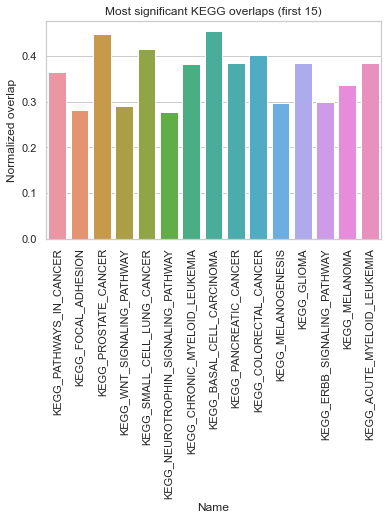

In [94]:
total = len(functions.gs_name.unique())

ax = sns.barplot(x="Name", y="Normalized overlap", data=res.iloc[0:15,:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.figure.set_size_inches(5, 8)  # manually adjust figure size
#plt.tight_layout()  # automatically adjust elements inside the figure
#plt.xticks(rotation=90)
#plt.tight_layout()
ax.set_title(f"Most significant KEGG overlaps (first 15)")
plt.savefig('./kegg_top15_normalized.pdf', bbox_inches='tight')